<a href="https://colab.research.google.com/github/Nandhini-ds/Churn-Prediction-On-OLA-Driver-Using-Ensemble-Models/blob/main/OLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement**

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.



#Goal

As a data scientist, the task is to analyze monthly information for a segment of drivers from 2019 and 2020 and predict whether a driver is likely to leave the company based on their attributes, such as:

*  Demographics: city, age, gender, etc.

*  Tenure information: joining date, last working date

*  Historical performance: quarterly ratings, monthly business acquired, grade, income

The goal is to build a predictive model to identify drivers at risk of leaving, enabling proactive retention strategies.


#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('ola_driver_scaler.csv')
df_original = df.copy()

In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
df

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


#Basis Analysis of Data

In [ ]:
#Shape
df.shape

(19104, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [ ]:
df.nunique()

,0
Unnamed: 0,19104
MMM-YY,24
Driver_ID,2381
Age,36
Gender,2
City,29
Education_Level,3
Income,2383
Dateofjoining,869
LastWorkingDate,493


# Insights

*  We should remove the **Unnamed** column, as it only represents the row index and does not provide meaningful information for EDA or modeling.

*  **Numeric features (Continuous)** :  Age, Income, Total Business Value

*  **Categorical (Ordinal)** : Education_Level, Joining Designation, Grade, Quarterly Rating

*   **Categorical (Discrete)** : Gender, City

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')


In [ ]:
#checking duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
#checking missing values
df.isna().sum()

,0
MMM-YY,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488
Joining Designation,0


In [ ]:
round((df.isna().sum()/len(df))*100,2)

,0
MMM-YY,0.00
Driver_ID,0.00
Age,0.32
Gender,0.27
City,0.00
Education_Level,0.00
Income,0.00
Dateofjoining,0.00
LastWorkingDate,91.54
Joining Designation,0.00


#Insights

*  The columns **Age, Gender, and Last Working Date** contain missing values of 0.32%, 0.22%, and 91% respectively.

*  Age and Gender column contain only few missing values, so we can fill them using imputation methods to retain their impact on the analysis.

In [ ]:
#statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,19104.0,9551.500000,5.514994e+03,0.0,4775.75,9551.5,14327.25,19103.0
Driver_ID,19104.0,1415.591133,8.107053e+02,1.0,710.00,1417.0,2137.00,2788.0
Age,19043.0,34.668435,6.257912e+00,21.0,30.00,34.0,39.00,58.0
Gender,19052.0,0.418749,4.933670e-01,0.0,0.00,0.0,1.00,1.0
Education_Level,19104.0,1.021671,8.001671e-01,0.0,0.00,1.0,2.00,2.0
Income,19104.0,65652.025126,3.091452e+04,10747.0,42383.00,60087.0,83969.00,188418.0
Joining Designation,19104.0,1.690536,8.369837e-01,1.0,1.00,1.0,2.00,5.0
Grade,19104.0,2.252670,1.026512e+00,1.0,1.00,2.0,3.00,5.0
Total Business Value,19104.0,571662.074958,1.128312e+06,-6000000.0,0.00,250000.0,699700.00,33747720.0
Quarterly Rating,19104.0,2.008899,1.009832e+00,1.0,1.00,2.0,3.00,4.0


**Data type conversion**

In [ ]:
date = ['MMM-YY','Dateofjoining','LastWorkingDate']
for col in date:
  df[col] = pd.to_datetime(df[col])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

#KNN Imputation

In [ ]:
num_fea = df.select_dtypes(include='number')
num_droped =num_fea.drop(['Driver_ID'],axis=1)
num_droped

,Unnamed: 0,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,28.0,0.0,2,57387,1,1,2381060,2
1,1,28.0,0.0,2,57387,1,1,-665480,2
2,2,28.0,0.0,2,57387,1,1,0,2
3,3,31.0,0.0,2,67016,2,2,0,1
4,4,31.0,0.0,2,67016,2,2,0,1
...,...,...,...,...,...,...,...,...,...
19099,19099,30.0,0.0,2,70254,2,2,740280,3
19100,19100,30.0,0.0,2,70254,2,2,448370,3
19101,19101,30.0,0.0,2,70254,2,2,0,2
19102,19102,30.0,0.0,2,70254,2,2,200420,2


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
impute = imputer.fit_transform(num_droped)
imputed_df = pd.DataFrame(impute, columns=num_droped.columns)



In [ ]:
non_numeric = df.select_dtypes(exclude ='number')
print(len(imputed_df), len(non_numeric))

19104 19104


In [ ]:
concat_df = pd.concat([imputed_df,non_numeric],axis=1)
uni_dri = pd.DataFrame(df['Driver_ID'].unique(), columns=['Driver_ID'])

In [ ]:
agg_col ={
     'MMM-YY':'count',
     'Age':'max',
     'Gender':'first',
     'City':lambda x:x.mode()[0],
     'Education_Level':lambda x:x.mode()[0],
     'Income':'mean',
     'Dateofjoining':'first',
     'LastWorkingDate':'last',
     'Joining Designation':lambda x:x.mode()[0],
     'Grade':'max',
     'Total Business Value':'sum',
     'Quarterly Rating':'last'
}


In [ ]:
driver_agg = df.groupby('Driver_ID').agg(agg_col).reset_index()
driver_ola = uni_dri.merge(driver_agg, on='Driver_ID', how='left')
driver_ola

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,3,28.0,0.0,C23,2,57387.0,2018-12-24,2019-03-11,1,1,1715580,2
1,2,2,31.0,0.0,C7,2,67016.0,2020-11-06,NaT,2,2,0,1
2,4,5,43.0,0.0,C13,2,65603.0,2019-12-07,2020-04-27,2,2,350000,1
3,5,3,29.0,0.0,C9,0,46368.0,2019-01-09,2019-03-07,1,1,120360,1
4,6,5,31.0,1.0,C11,1,78728.0,2020-07-31,NaT,3,3,1265000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,24,34.0,0.0,C24,0,82815.0,2015-10-15,NaT,2,3,21748820,4
2377,2785,3,34.0,1.0,C9,0,12105.0,2020-08-28,2020-10-28,1,1,0,1
2378,2786,9,45.0,0.0,C19,0,35370.0,2018-07-31,2019-09-22,2,2,2815090,1
2379,2787,6,28.0,1.0,C20,2,69498.0,2018-07-21,2019-06-20,1,1,977830,1


#Feature Engineering

**Quarterly_Rating_Increased**

In [ ]:
ft=df.groupby('Driver_ID')['Quarterly Rating'].agg(['first','last']).reset_index()
ft['Quarterly_Rating_Increased'] =ft.apply(lambda x: 1 if x['last']>x['first'] else 0, axis=1)
driver_ola = driver_ola.merge(ft[['Driver_ID', 'Quarterly_Rating_Increased']],
    on='Driver_ID',
    how='left')

**Monthly Income**

In [ ]:
income =df.groupby('Driver_ID')['Income'].agg(['first','last']).reset_index()
income['Income_Increased']=income.apply(lambda x: 1 if x['last']>x['first'] else 0,axis=1)
driver_ola=driver_ola.merge(income[['Driver_ID','Income_Increased']], on='Driver_ID', how='left')

In [ ]:
#Extraction
driver_ola['joining year']=driver_ola['Dateofjoining'].dt.year
driver_ola['leaving year']=driver_ola['LastWorkingDate'].dt.year
driver_ola['Reporting Month'] = df['MMM-YY'].dt.month
driver_ola['Reporting Quarter'] = df['MMM-YY'].dt.quarter

In [ ]:
reference_date = pd.to_datetime("2020-12-31")

# Tenure in years
driver_ola['Tenure Years'] = (
    (driver_ola['LastWorkingDate'].fillna(reference_date) - driver_ola['Dateofjoining']).dt.days / 365
)

In [ ]:
driver_ola['Age Group']=pd.cut(driver_ola['Age'], bins=4, labels=['20-25', '26-35', '35-45', '50+'])


In [ ]:
driver_ola['Target']=driver_ola['LastWorkingDate'].notnull().astype(int)
driver_ola

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,...,Total Business Value,Quarterly Rating,Quarterly_Rating_Increased,Income_Increased,joining year,leaving year,Reporting Month,Tenure Years,Age Group,Target
0,1,3,28.0,0.0,C23,2,57387.0,2018-12-24,2019-03-11,1,...,1715580,2,0,0,2018,2019.0,1,0.210959,20-25,1
1,2,2,31.0,0.0,C7,2,67016.0,2020-11-06,NaT,2,...,0,1,0,0,2020,NaN,2,0.150685,26-35,0
2,4,5,43.0,0.0,C13,2,65603.0,2019-12-07,2020-04-27,2,...,350000,1,0,0,2019,2020.0,3,0.389041,35-45,1
3,5,3,29.0,0.0,C9,0,46368.0,2019-01-09,2019-03-07,1,...,120360,1,0,0,2019,2019.0,11,0.156164,20-25,1
4,6,5,31.0,1.0,C11,1,78728.0,2020-07-31,NaT,3,...,1265000,2,1,0,2020,NaN,12,0.419178,26-35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,24,34.0,0.0,C24,0,82815.0,2015-10-15,NaT,2,...,21748820,4,1,0,2015,NaN,1,5.216438,26-35,0
2377,2785,3,34.0,1.0,C9,0,12105.0,2020-08-28,2020-10-28,1,...,0,1,0,0,2020,2020.0,2,0.167123,26-35,1
2378,2786,9,45.0,0.0,C19,0,35370.0,2018-07-31,2019-09-22,2,...,2815090,1,0,0,2018,2019.0,3,1.145205,35-45,1
2379,2787,6,28.0,1.0,C20,2,69498.0,2018-07-21,2019-06-20,1,...,977830,1,0,0,2018,2019.0,4,0.915068,20-25,1


#Statistical summary

In [ ]:
driver_ola.describe().T

,count,mean,min,25%,50%,75%,max,std
Driver_ID,2381.0,1397.559009,1.0,695.0,1400.0,2100.0,2788.0,806.161628
MMM-YY,2381.0,8.02352,1.0,3.0,5.0,10.0,24.0,6.78359
Age,2381.0,33.663167,21.0,29.0,33.0,37.0,58.0,5.983375
Gender,2381.0,0.410332,0.0,0.0,0.0,1.0,1.0,0.491997
Education_Level,2381.0,1.00756,0.0,0.0,1.0,2.0,2.0,0.81629
Income,2381.0,59232.460484,10747.0,39104.0,55285.0,75835.0,188418.0,28298.214012
Dateofjoining,2381,2019-02-08 07:14:50.550189056,2013-04-01 00:00:00,2018-06-29 00:00:00,2019-07-21 00:00:00,2020-05-02 00:00:00,2020-12-28 00:00:00,NaN
LastWorkingDate,1616,2019-12-21 20:59:06.534653440,2018-12-31 00:00:00,2019-06-06 00:00:00,2019-12-20 12:00:00,2020-07-03 00:00:00,2020-12-28 00:00:00,NaN
Joining Designation,2381.0,1.820244,1.0,1.0,2.0,2.0,5.0,0.841433
Grade,2381.0,2.097018,1.0,1.0,2.0,3.0,5.0,0.941702


**Observations**

*  The maximum **age** of of the driver in this dataset is **58**.

*  The Average income of the driver is **59,232.**

*  **50%** of the drivers are belong to the **education level of 1.**

*  There is a difference in mean and median value for Total business value and tenure indicate possibility of outliers.

#Outliers

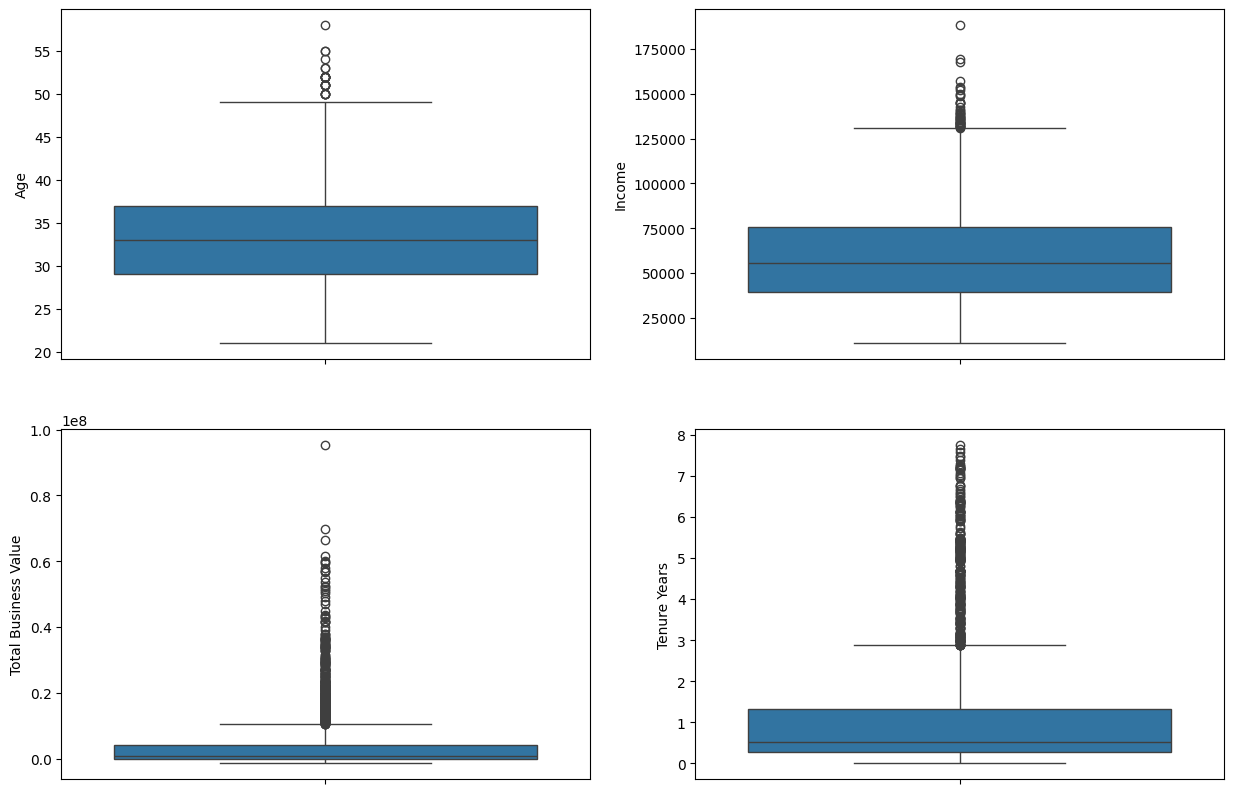

In [ ]:
uni_col = ['Age','Income','Total Business Value', 'Tenure Years']
plt.figure(figsize=(15,10))
for i,col in enumerate(uni_col,1):
  plt.subplot(2,2,i)
  sns.boxplot(driver_ola[col])

#Insights

*  The boxplots of the **Age and Income** columns show a moderate number of outliers, whereas the **Total Business Value** and **Tenure Years** column exhibits the higher number of outliers.

*  These outliers are not necessarily abnormal values, but rather represent natural variation in the data.

*  To further assess the distribution, we can examine the skewness of these columns.

In [ ]:
print("Skewness of Age:",driver_ola['Age'].skew())
print("Skewness of Income:",driver_ola['Income'].skew())
print("Skewness of Total Business Value:", driver_ola['Total Business Value'].skew())
print("Skewness of Total Business Value:", driver_ola['Tenure Years'].skew())

Skewness of Age: 0.5390982860414438
Skewness of Income: 0.7776030027035904
Skewness of Total Business Value: 3.3613354327904497
Skewness of Total Business Value: 2.0534865554622117


*  The Age and Income columns are not extremely skewed, whereas Total Business Value is heavily right-skewed. However, tree-based models like Random Forest and Gradient Boosting are generally robust to skewed features, so this skewness is unlikely to affect model performance.

#Univariate Analysis

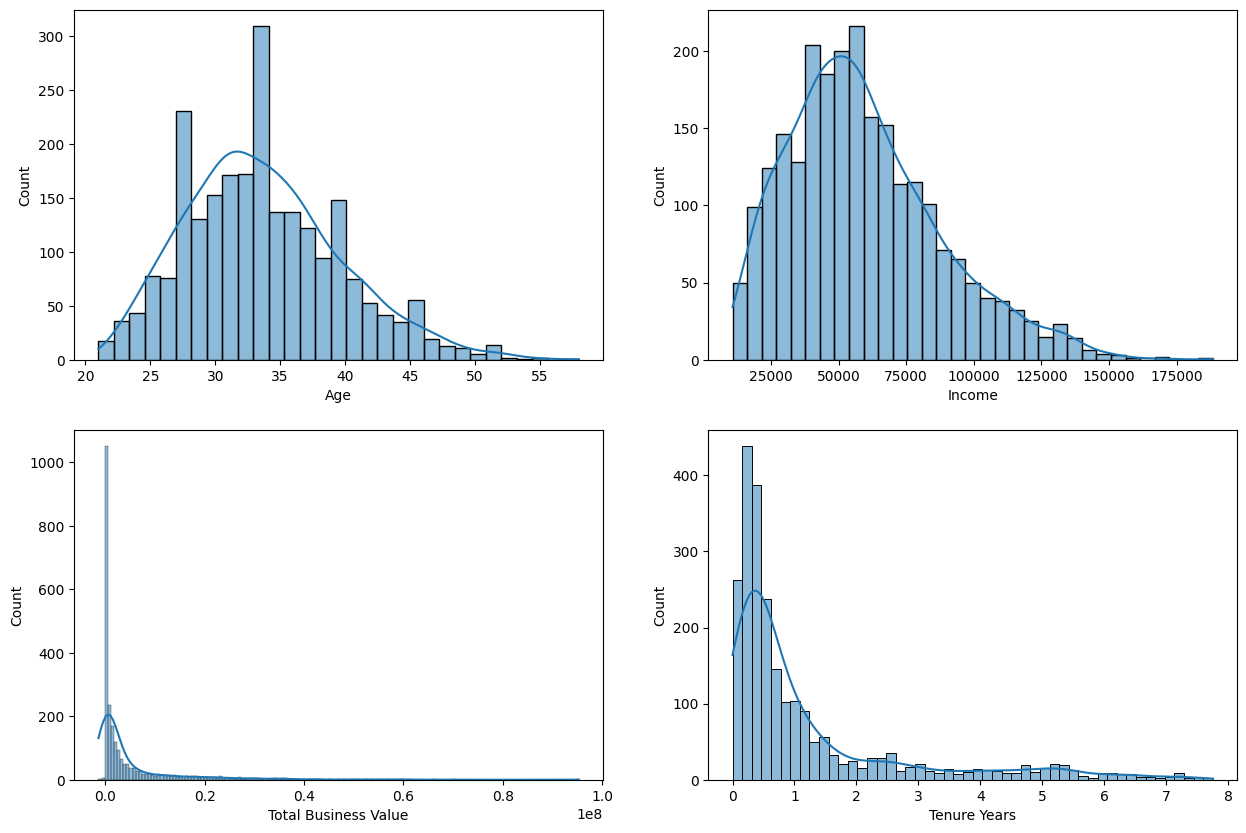

In [ ]:
uni_col = ['Age','Income','Total Business Value', 'Tenure Years']
plt.figure(figsize=(15,10))
for i,col in enumerate(uni_col,1):
  plt.subplot(2,2,i)
  sns.histplot(driver_ola[col],kde=True)

#Insights

*   The histogram of the **Age and Income** columns show a slight right skew, indicating that most drivers belong to the middle-age and mid-income groups. Only a few drivers are above 50 years old and earn higher incomes.

*   The **Total Business Value** histogram shows a right-skewed distribution, with most drivers having moderate values and a few contributing extremely high values.

*  The right-skewed distribution of **tenure** shows that most drivers leave within the first year, while only a few stay longer.

**Categorical distibutions**

In [ ]:
cat_col = ['Reporting Month','Gender', 'City','Education_Level', 'Age Group', 'Joining Designation', 'Grade', 'Quarterly Rating', 'Target', 'leaving year', 'joining year']
for col in cat_col:
    print(driver_ola[col].value_counts(normalize=True)*100)
    print(15* "*********")

Reporting Month
1     9.869803
2     9.323814
3     8.651827
11    8.357833
12    8.357833
7     8.189836
10    8.063839
8     8.063839
9     7.937841
4     7.853843
5     7.769845
6     7.559849
Name: proportion, dtype: float64
***************************************************************************************************************************************
Gender
0.0    58.966821
1.0    41.033179
Name: proportion, dtype: float64
***************************************************************************************************************************************
City
C20    6.383872
C15    4.241915
C29    4.031919
C26    3.905922
C27    3.737925
C8     3.737925
C10    3.611928
C16    3.527929
C3     3.443931
C22    3.443931
C28    3.443931
C12    3.401932
C1     3.359933
C5     3.359933
C14    3.317934
C21    3.317934
C6     3.275934
C4     3.233935
C7     3.191936
C9     3.149937
C23    3.107938
C25    3.107938
C24    3.065939
C19    3.023940
C2     3.023940
C13    2.981940
C17 

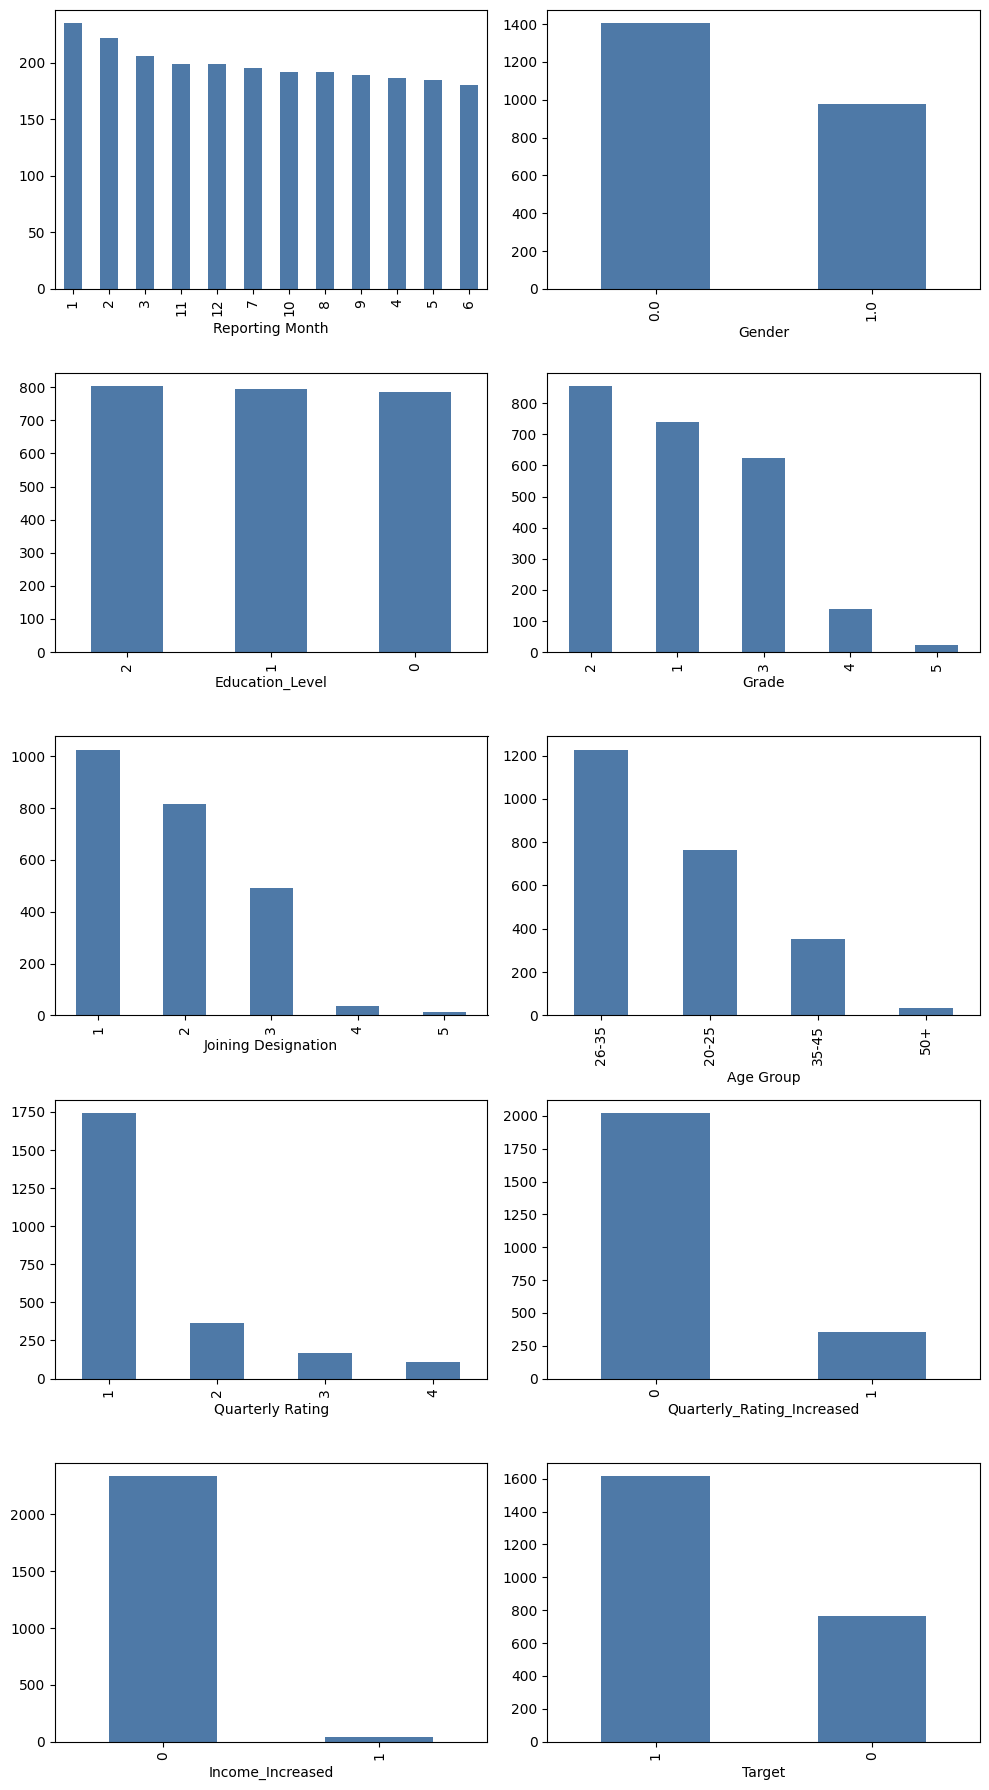

In [ ]:
cat_n = ['Reporting Month','Gender','Education_Level','Grade','Joining Designation','Age Group', 'Quarterly Rating', 'Quarterly_Rating_Increased', 'Income_Increased', 'Target']

plt.figure(figsize=(10,18))
for i, col in enumerate(cat_n,1):
    plt.subplot(5,2,i)
    driver_ola[col].value_counts().plot(kind='bar',color="#4E79A7")
plt.tight_layout()
plt.show()

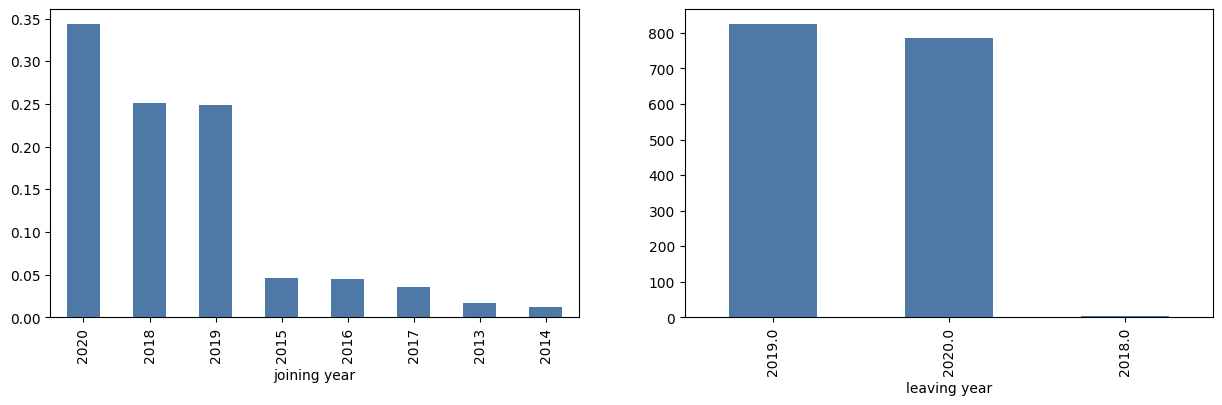

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
driver_ola['joining year'].value_counts(normalize=True).plot(kind='bar', color="#4E79A7")

plt.subplot(1,2,2)
driver_ola['leaving year'].value_counts().plot(kind='bar', color="#4E79A7")
plt.show()

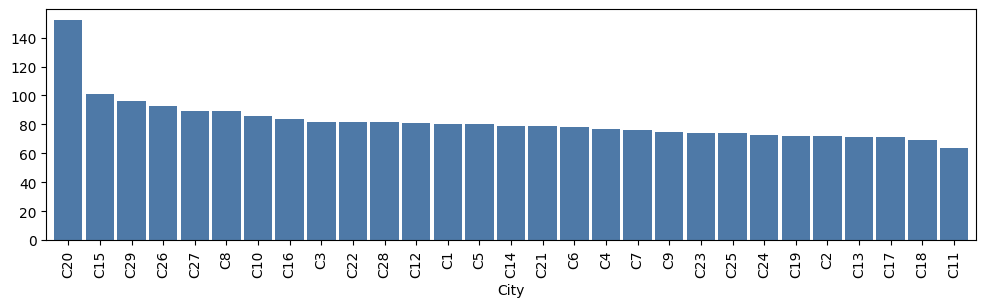

In [ ]:
plt.figure(figsize=(12,3))
driver_ola['City'].value_counts().plot(kind='bar', width=0.9,color="#4E79A7")
plt.show()

#Insights

*  **59%** of the drivers are **male.**

*  Drivers are evenly distributed across all education levels.

*  **36%** of the drivers are aligned with **Grade 2**, while grade 4 and 5 are significantly **low**.

*  There is no increase in the **monthly income** as well as the **quarterly rating** of drivers.

*  Most drivers fall within the **26 to 35 age group.**

*  The majority of drivers belong to the **Joining Designation 1** category.

*  **67.8%** of the drivers have **churned**, showing class imbalance.

*   The **joining rate** of drivers is higher in the year **2020** compared to the earlier part of the year. Similarly, a significant number of driver **churns** occurred in **2019 and 2020** according to the dataset.

*   The distribution of drivers across city codes shows that **City20** has the largest count, suggesting that this city contributes the most drivers compared to other locations

#Bivariate Analysis

**Age and Income Distribution by Gender**

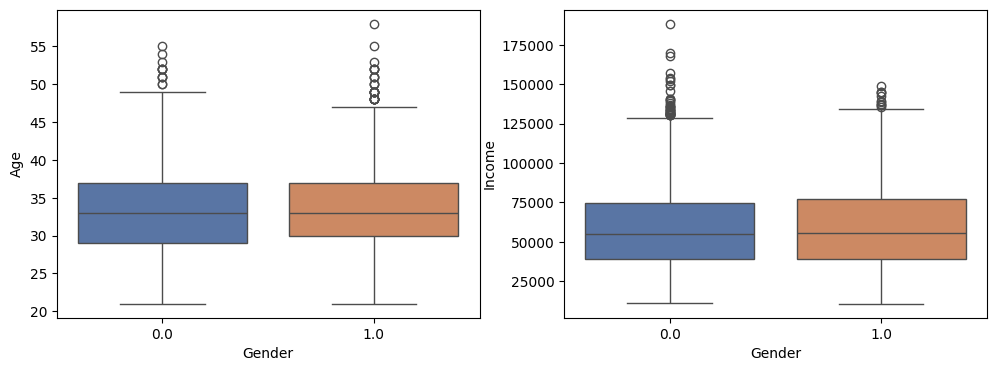

In [ ]:
custom_palette = sns.color_palette("deep")
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x='Gender', y='Age', data=driver_ola,  palette=custom_palette)

plt.subplot(1,2,2)
sns.boxplot(x='Gender', y='Income', data=driver_ola,  palette=custom_palette)
plt.show()

#Insights

*  The median age and income for both male and female drivers are the same.

*  The box plot indicates the presence of extreme age outliers in the female category.

*  A few male drivers earn higher income compared to female drivers.

**City-wise Quarterly Rating Improvement**

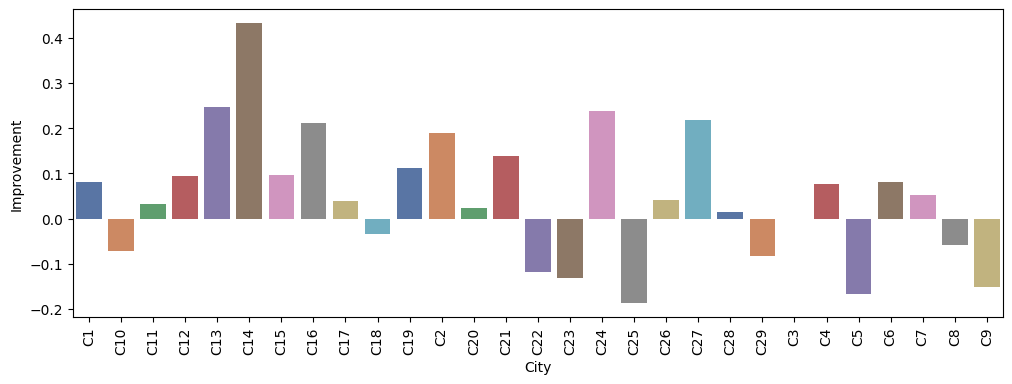

In [ ]:
f=driver_ola.groupby(['City','Reporting Year'])['Quarterly Rating'].mean().reset_index()
pivot_df = f.pivot(
    index='City',
    columns='Reporting Year',
    values='Quarterly Rating'
).reset_index()

pivot_df['Improvement'] = pivot_df[2020]-pivot_df[2019]
plt.figure(figsize=(12,4))
sns.barplot(x='City', y='Improvement', data=pivot_df, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()

#Insights

*  There is **a significant improvement in quarterly rating for c14** compared to other cities. This indicates that drivers in this city **performed consistently better**, possibly due to factors like **better management, higher experience, or efficient operations**

*  More than half of the cities show an improvent in ratings.

*  A few cities show negative values, indicating no improvement in ratings compared to the previous year.

**Grade vs Total Business value**

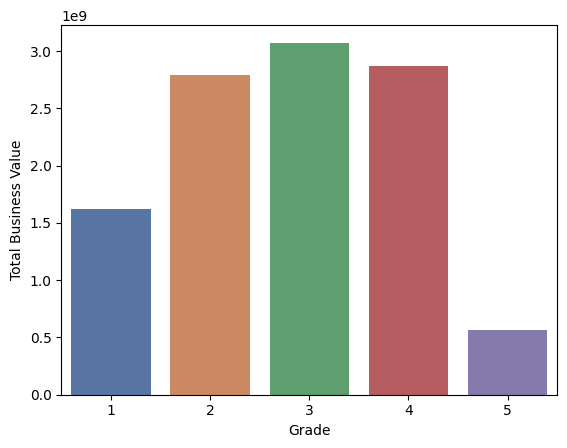

In [ ]:
value=driver_ola.groupby('Grade')['Total Business Value'].sum().reset_index()
sns.barplot(x='Grade', y='Total  Business Value', data=value, palette=custom_palette)
plt.show()

#Insighsts

*  **Grades 2, 3, and 4** have the highest total business value, with **Grade 3** slightly **outperforming** Grades 2 and 4.

*  **Grade 5** contributes **significantly less** to total business value, indicating drivers in this grade report **less monthly business**.

**Business value vs City**

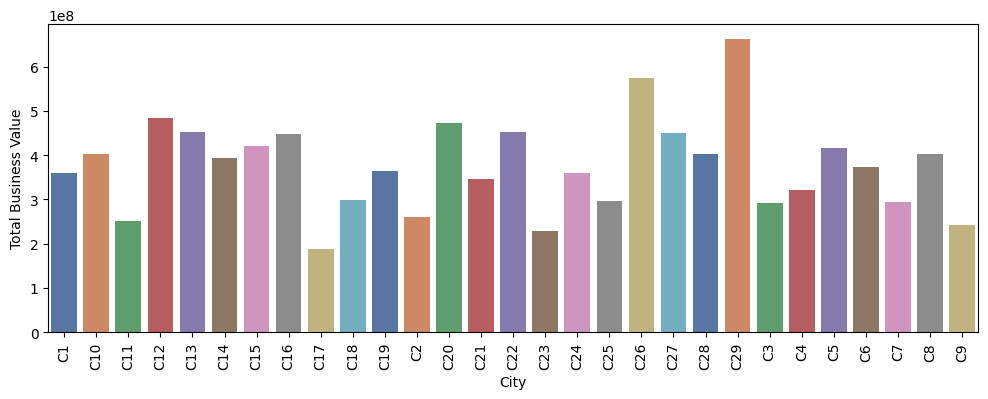

In [ ]:
plt.figure(figsize=(12,4))
per_df=driver_ola.groupby('City')['Total Business Value'].sum().reset_index()
sns.barplot(x='City', y='Total Business Value', data=per_df, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()

#Insights

*  **C29** contributed the **highest total business value**, followed by **C26**. This suggests these cities are likely **busy or important locations**, such as **railway stations or airports**, where drivers handle more trips and revenue.

*  **City C17 has the lowest contribution** to total business value, which suggests it may be rural or less crowd area with fewer trips.

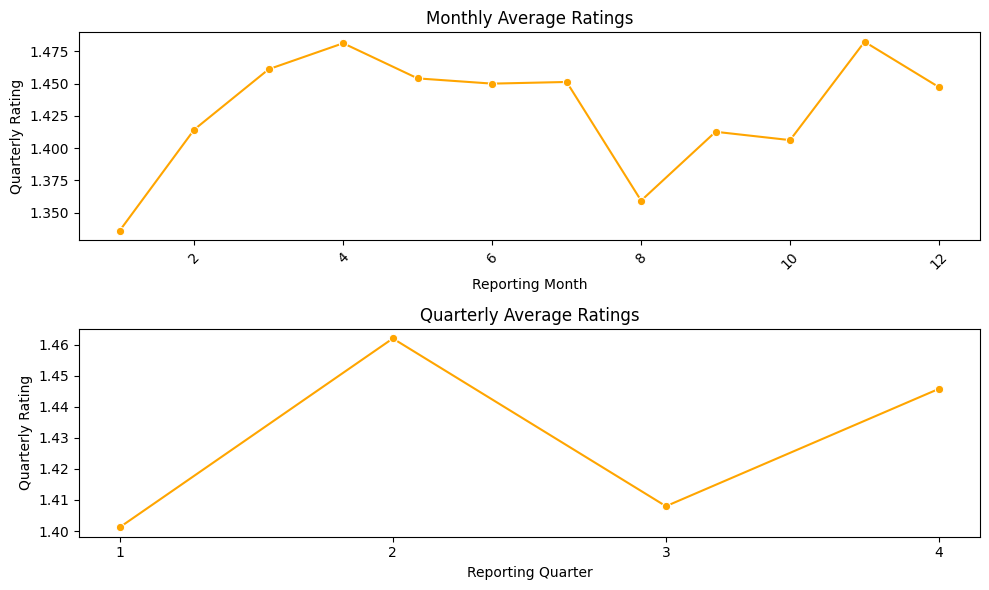

In [ ]:
month_avg = driver_ola.groupby('Reporting Month')['Quarterly Rating'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
sns.lineplot(x='Reporting Month', y='Quarterly Rating', data=month_avg, marker='o',color='orange')
plt.xticks(rotation=45)
plt.title('Monthly Average Ratings')

#  Quarterly plot
quar = driver_ola.groupby('Reporting Quarter')['Quarterly Rating'].mean().reset_index()
plt.subplot(2,1,2)
sns.lineplot(x='Reporting Quarter', y='Quarterly Rating', data=quar, marker='o',color='orange')
plt.xticks(quar['Reporting Quarter'])
plt.title('Quarterly Average Ratings')

plt.tight_layout()
plt.show()

#Insights

*  There is noticeable **dip** in driver ratings during **auguest** which falls under **Q3**. Since it corresponds to monsoon driver might face some **perational challenges (traffic, delays, cancellations)**.

*  Drivers receive **higher** ratings during **April**, which falls under **Q2**. The summer vacation period, clear weather, and fewer cancellations lead to more successful trips, resulting in higher customer ratings.

**Impact of features on the Target Variable**

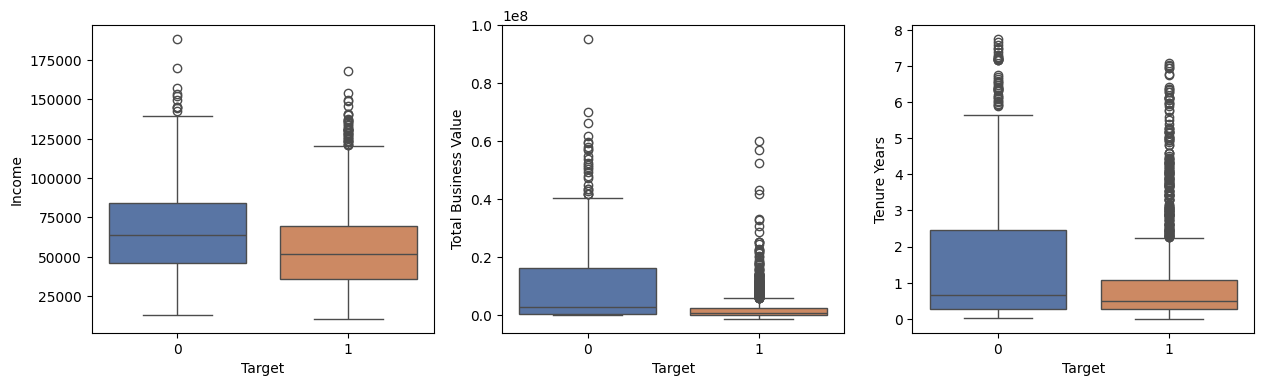

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.boxplot(x='Target', y='Income', data=driver_ola, palette=custom_palette)

plt.subplot(1,3,2)
sns.boxplot(x='Target', y='Total Business Value', data=driver_ola, palette=custom_palette)

plt.subplot(1,3,3)
sns.boxplot(x='Target', y='Tenure Years', data=driver_ola, palette=custom_palette)
plt.show()

#Insights

*  The boxplot show the **median income** of churned driver are **lower** compared to drivers with not leaved.

*  Drivers who churned contributed **significantly less total business value** compared to those who stayed.

*  The typical driver stays for about the same time, whether they churn or not.

*  Hence drivers who ***earn less** and contribute **less to the business** are more likely to **churn**.

In [ ]:
sns

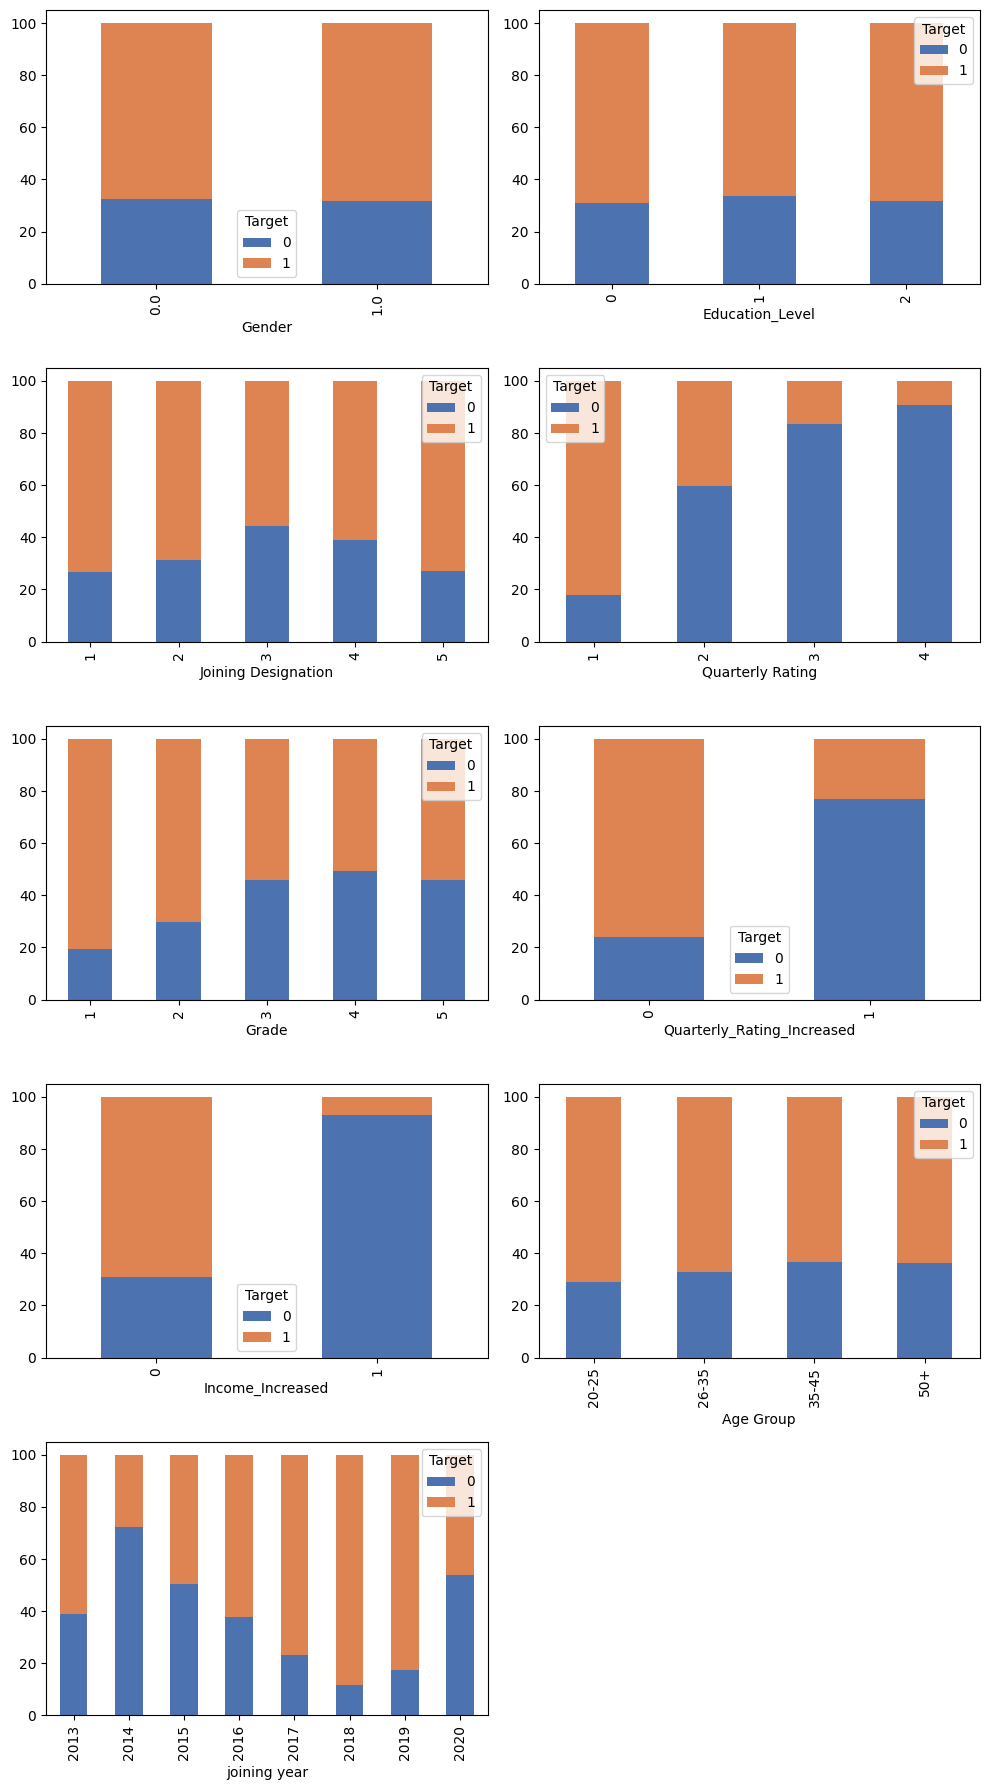

In [ ]:
bi_var=['Gender', 'Education_Level', 'Joining Designation','Quarterly Rating','Grade','Quarterly_Rating_Increased',
        'Income_Increased', 'Age Group','joining year']

plt.figure(figsize=(10, 18))
for i,col in enumerate(bi_var,1):
     plt.subplot(5,2,i)

     f = driver_ola.groupby(col)['Target'].value_counts(normalize=True).unstack() * 100
     f.plot(kind='bar', stacked=True, color=custom_palette, ax=plt.gca())

plt.tight_layout()
plt.show()

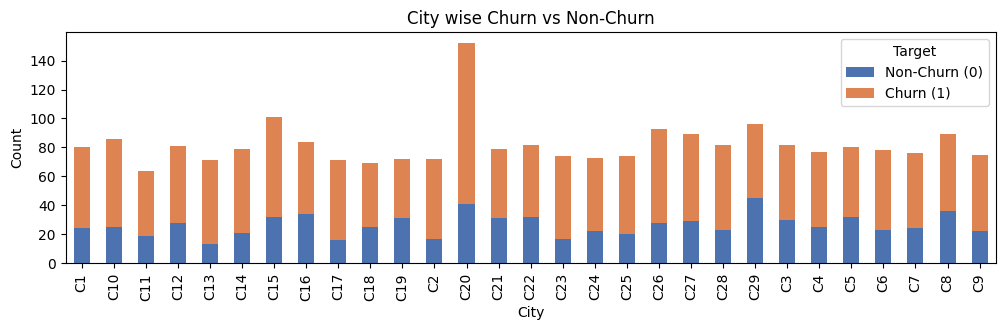

In [ ]:
f = driver_ola.groupby('City')['Target'].value_counts().unstack().plot(kind='bar', stacked=True, color=custom_palette)

plt.ylabel("Count")
plt.title("City wise Churn vs Non-Churn")
plt.legend(["Non-Churn (0)", "Churn (1)"], title="Target")
plt.gcf().set_size_inches(12, 3)
plt.show()

#Insights

*  **Gender and Education** Level are evenly distributed and do not significantly affect churn.

*  Roughly **73%** of drivers with a **joining designation of 1 or 5** are more likely to churn compared to other designation levels.

*  Almost 82% of drivers with a **quarterly rating of 1** are **more likely** to churn, whereas drivers with a quarterly rating of **4** are **less likely** to churn.

*  There is **no significant difference in churn across age groups**, as all age groups are almost equally distributed in the target.

*  A significant proportion of drivers churned when their monthly income and quarterly rating did not increase.

*  Drivers from **City Code 20** are more likely to **churn** than drivers from other cities.



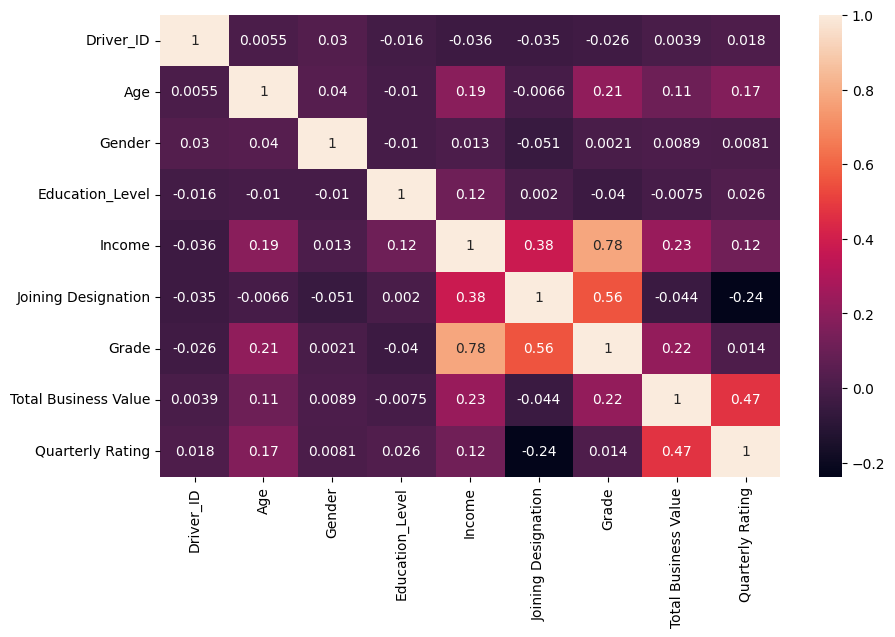

In [ ]:
plt.figure(figsize=(10,6))
cor = df.select_dtypes(include='number')
sns.heatmap(cor.corr(), annot=True)
plt.show()

**Interpretation**

*  There is a **strong positive correlation (0.74) between income and grade**, indicating that drivers with higher grades tend to earn higher income.

*  **Grade and joining designation have a a moderate positive correlation (0.56)**, also with total business value indicating that grades tend to increase as the level of the designation increases.

*  **Income is positively correlated with joining designation and total value business**. This is an expected trend drivers who generate more business are likely to be promoted resulting in higher income.

*  **Age** has weak positive correlation with attributes such as **income, grage, quarterly rating and total business value**.

Some features show linear relationships with other features, which may introduce multicollinearity. Further analysis, such as feature importance, can help identify the most influential variables for the predictive model.

**Correlation between driver ratings and
factors like age, income, and
education**
___________________________________________________________________________

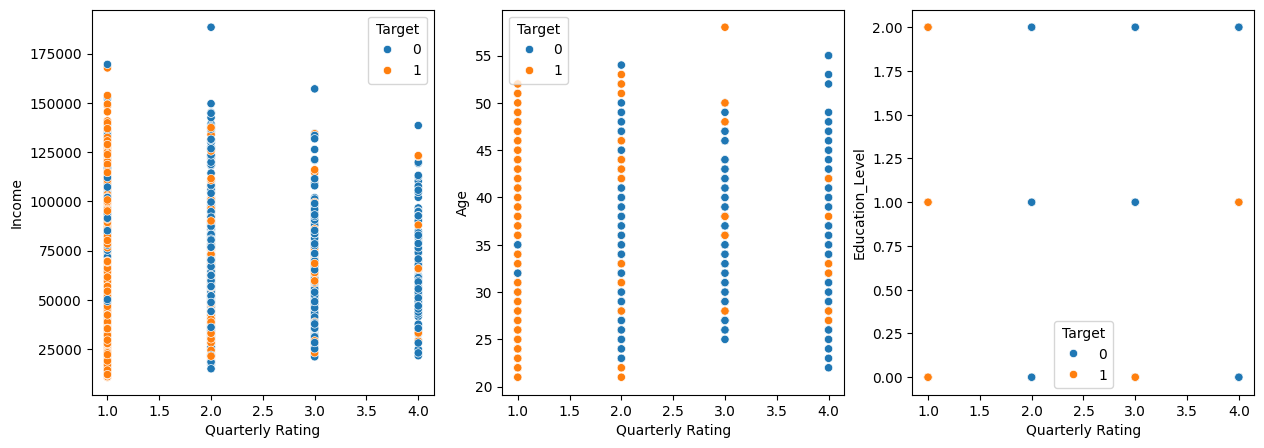

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.scatterplot(x='Quarterly Rating', y='Income',hue='Target',data=driver_ola)
plt.subplot(1,3,2)
sns.scatterplot(x='Quarterly Rating', y='Age',hue='Target',data=driver_ola)
plt.subplot(1,3,3)
sns.scatterplot(x='Quarterly Rating', y='Education_Level',hue='Target',data=driver_ola)
plt.show()

**Interpretation**

*  Income, Age, and Education do not show a strong relationship with Quarterly Rating.

#Model building

In [ ]:
x=driver_ola.drop(columns=['Driver_ID','Dateofjoining','joining year', 'LastWorkingDate','Target', 'leaving year',  'Age Group',],axis=1)
y=driver_ola['Target']

#Data Splitting


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, stratify=y, random_state=42)

#Encoding

In [ ]:
mean_target = y_train.groupby(x_train['City']).mean()
#trainset
x_train['city_new'] = x_train['City'].map(mean_target)
#testset
x_test['city_new']=x_test['City'].map(mean_target)
x_test['city_new'] = x_test['city_new'].fillna(y_train.mean())
x_train=x_train.drop('City',axis=1)
x_test = x_test.drop(columns=['City'])

#Class Imbalance


In [ ]:
y_train.value_counts(normalize=True)*100

,proportion
Target,
1,67.857143
0,32.142857


As we seen earlier churn class contain more samples than non churn.

#Class Imbalance treatment using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_res, y_train_res=smote.fit_resample(x_train,y_train)

In [ ]:
y_train_res.value_counts(normalize=True)

,proportion
Target,
0,0.5
1,0.5


#Ensemble Learning:Bagging


**Using Random Forest classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, ConfusionMatrixDisplay
rfc = RandomForestClassifier(random_state=42)

#fit the model
rfc.fit(x_train_res,y_train_res)

#predict
y_pred=rfc.predict(x_test)

#cross validation
cv=cross_val_score(rfc,x_train_res,y_train_res, cv=5, scoring='accuracy')
print("Cross Validation Score:", cv)
print("Cross Validation AVGScore:", cv.mean())
print("Training Accuracy Score:", accuracy_score(y_train_res,rfc.predict(x_train_res)))
print("Test Accuracy Score:", accuracy_score(y_test, y_pred))

Cross Validation Score: [0.84912959 0.80851064 0.87814313 0.86460348 0.91085271]
Cross Validation AVGScore: 0.8622479120747304
Training Accuracy Score: 1.0
Test Accuracy Score: 0.8616352201257862


**Scaling**

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled  = scaler.transform(x_test)

sm2 = SMOTE(random_state=42)
X_res2, y_res2 = sm2.fit_resample(X_train_scaled, y_train)

rf2 = RandomForestClassifier(random_state=42)
rf2.fit(X_res2, y_res2)

pred2 = rf2.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, pred2)


cv2=cross_val_score(rf2, X_res2, y_res2 , cv=5, scoring='accuracy')
print("Cross Validation Score:", cv2)
print("Cross Validation AVGScore:", cv2.mean())
print("Training Accuracy Score:", accuracy_score(y_res2,rf2.predict(X_res2)))
print("Test Accuracy Score:", accuracy_score(y_test, rf2.predict(X_test_scaled)))

Random Forest Accuracy (with scaling): 0.8679245283018868
Cross Validation Score: [0.8549323  0.82591876 0.89748549 0.89941973 0.92635659]
Cross Validation AVGScore: 0.8808225750828423
Training Accuracy Score: 1.0
Test Accuracy Score: 0.8679245283018868


**Interpretation**

*  For both **scaled and unscaled features**, the model achieved **100% training accuracy,** while the **test accuracy** was **86.37% (unscaled) and 86.79% (scaled).**

*  This indicates the model is **overfitting the training data**, so **hyperparameter tuning** is needed to reduce overfitting.

#Confusion Matrix and classification report

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[121,  32],
       [ 34, 290]])

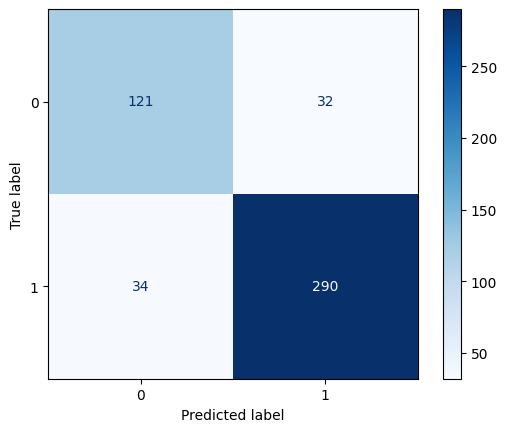

In [ ]:
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.show()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred, target_names=['No Churn','Churn']))

              precision    recall  f1-score   support

    No Churn       0.79      0.78      0.79       153
       Churn       0.90      0.90      0.90       324

    accuracy                           0.86       477
   macro avg       0.84      0.84      0.84       477
weighted avg       0.86      0.86      0.86       477



**Interpretation**

*  **FN = 31** The model has incorrectly precited **Churn** as **Non churn** for 31 drivers.

*  **FP = 34** The model predicted **Churn** for drivers who didn't churn.

*  **Churn (Positive class):**

   *  **90% recall** value indicates the model correctly identifies 90% of drivers who actually **churned.**

   *  **90% precision** indicatges out of the **predicted churned** drivers 90% of them were correct.

*  **No Churn (Negative class):**

   *  **Lower precision/recall (~78-79%)** → Model struggles more with retaining drivers.

In [ ]:
#adjust some parameters
from sklearn.model_selection import GridSearchCV
rf_hy = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42
)
rf_hy.fit(x_train_res,y_train_res)
print("Training Accuracy:", accuracy_score(y_train_res,rf_hy.predict(x_train_res)))
print("Testing Accuracy:", accuracy_score(y_test,rf_hy.predict(x_test)))

Training Accuracy: 0.8688080495356038
Testing Accuracy: 0.8553459119496856


**Hyper parameter tuning using Grid serach cv**

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [6, 7, 8, 10],
    'max_features': [4, 6],
    'min_samples_leaf': [4, 5, 7],
    'ccp_alpha': [0.0005, 0.00075, 0.001]
}
rf_param=RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_param,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(x_train_res,y_train_res)
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Parameters: {'ccp_alpha': 0.0005, 'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 4, 'n_estimators': 200}


In [ ]:
#get the best model
best_model=grid_search.best_estimator_
y_pred=best_model.predict(x_test)
print("Training Accuracy:", accuracy_score(y_train_res,best_model.predict(x_train_res)))
print("Testing Accuracy:", accuracy_score(y_test,best_model.predict(x_test)))

Training Accuracy: 0.9156346749226006
Testing Accuracy: 0.8616352201257862


The gap between training and testing acuracy is **smaller(~5%)** so the model is **generalizing reasonably well** on unseen data.



#Confusion Matrix and Classification Report on best_model

In [ ]:
cm=confusion_matrix(y_test, best_model.predict(x_test))
cm

array([[123,  30],
       [ 36, 288]])

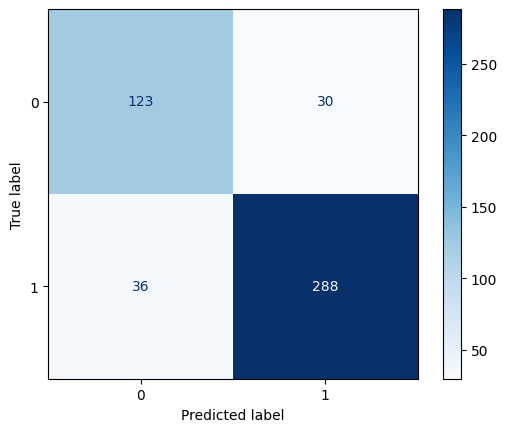

In [ ]:
disp=ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.show()

In [ ]:
print(classification_report(y_test,best_model.predict(x_test), target_names=['No Churn','Churn']))

              precision    recall  f1-score   support

    No Churn       0.77      0.80      0.79       153
       Churn       0.91      0.89      0.90       324

    accuracy                           0.86       477
   macro avg       0.84      0.85      0.84       477
weighted avg       0.86      0.86      0.86       477



**Interpretation**

*  **TP=288** and **TN=123** indicates the model correctly identifies most churned drivers and many retained drivers.

*  **FN=36 FP=30** FP is lower than FN so the model is makes fewer mistakes by predicting non churned drivers  as churn.

*  After hyperparameter tuning, the **recall** for the **churn class decreased** slightly from **90% to 89%**. However, recall for the **non-churn class** improved indicating the model is now better at identifying retained drivers and reducing class-wise bias. Since overall **accuracy remains stable** and performance **improved for the negative class**, we can conclude that the tuned model **generalizes well to unseen data**, even with an imbalanced dataset.

#ROC AUC curve

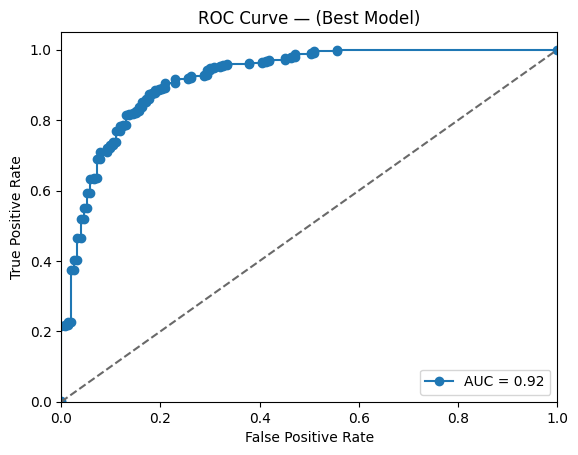

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
y_prob=best_model.predict_proba(x_test)[:,1]
fpr, tpr,thresholds = roc_curve(y_test, y_prob)
roc_auc=roc_auc_score(y_test,y_prob)
plt.plot(fpr, tpr, marker='o',label=(f"AUC = {roc_auc:.2f}"))
plt.plot([0, 1], [0, 1], color='dimgrey', linestyle='--')
plt.title("ROC Curve — (Best Model)")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()


The ROC-AUC score is 92%. This means the model can clearly tell churned drivers and non-churned drivers apart by giving higher scores to churned drivers most of the time.

#Feature Interpretation

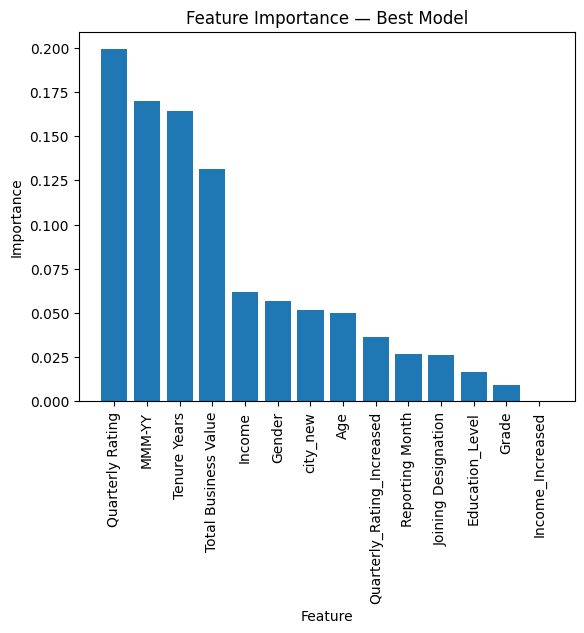

In [ ]:
col=x_train_res.columns
feature=pd.DataFrame(best_model.feature_importances_, columns=['Importance'],
                     index=col).sort_values('Importance', ascending=False).reset_index()
feature.rename(columns={'index': 'Feature'}, inplace=True)

plt.bar(feature['Feature'], feature['Importance'],)
plt.xticks(rotation=90)
plt.title("Feature Importance — Best Model")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.show()

**Interpretation**

*  For the Random Forest model, Quarterly Rating is the most influential predictor.

*  Reporting Month, Tenure (years), and Total Business Value are also strong predictors for identifying drivers likely to churn.

#Ensemble Learning:Boosting


**GradientBoostingClassifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)

#fit the data
gbc.fit(x_train_res, y_train_res)

#cross validation score
gbc_cv=cross_val_score(gbc,x_train_res,y_train_res, cv=5, scoring='accuracy')
print("Cross Validation Score:", gbc_cv)
print("Cross Validation AVGScore:", gbc_cv.mean())
print("Training Accuracy Score:", accuracy_score(y_train_res,gbc.predict(x_train_res)))
print("Test Accuracy Score:", accuracy_score(y_test, gbc.predict(x_test)))

Cross Validation Score: [0.81044487 0.77756286 0.86653772 0.86460348 0.88953488]
Cross Validation AVGScore: 0.8417367639782286
Training Accuracy Score: 0.8947368421052632
Test Accuracy Score: 0.8616352201257862


**Hyper parameter tuning using Randomized search**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

model = GradientBoostingClassifier(random_state=42)

param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(5, 15),
    'learning_rate': uniform(0.01, 0.29),  # range 0.01–0.3
    'min_samples_leaf': randint(2, 8),
    'subsample': uniform(0.6, 0.4)        # range 0.6–1.0
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(x_train_res, y_train_res)
print("Best parameters:", random_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'learning_rate': np.float64(0.13329520360246094), 'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 359, 'subsample': np.float64(0.6739417822102108)}


In [ ]:
#get the best model
best_gbc=random_search.best_estimator_
best_gbc.fit(x_train_res, y_train_res)
print("Training Accuracy Score:", accuracy_score(y_train_res,best_gbc.predict(x_train_res)))
print("Test Accuracy Score:", accuracy_score(y_test, best_gbc.predict(x_test)))

Training Accuracy Score: 1.0
Test Accuracy Score: 0.8867924528301887


*  Model achieved 100% accuracy on training data and 88% on testing data. let's tune some parameters and see how it works.

In [ ]:
#Tuning some parameters
new = GradientBoostingClassifier(
    learning_rate=0.05,
    min_samples_leaf=5,
    n_estimators=300,
    min_samples_split=10,
       max_features='sqrt',
    subsample=0.6,
  # optional way to control depth/complexity
    random_state=42
)
new.fit(x_train_res, y_train_res)
print("Training Accuracy Score:", accuracy_score(y_train_res,new.predict(x_train_res)))
print("Test Accuracy Score:", accuracy_score(y_test, new.predict(x_test)))

Training Accuracy Score: 0.8931888544891641
Test Accuracy Score: 0.8616352201257862


*  Now the gap between training and testing accuracy has reduced, so it can generalizes well on unseen data.

#XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb.fit(x_train_res, y_train_res)
xgb_cv = cross_val_score(xgb, x_train_res, y_train_res, cv=5, scoring='accuracy')
print("Cross Validation Score:", xgb_cv)
print("Cross Validation AVGScore:", xgb_cv.mean())
print("Training Accuracy Score:", accuracy_score(y_train_res,xgb.predict(x_train_res)))
print("Test Accuracy Score:", accuracy_score(y_test, xgb.predict(x_test)))

Cross Validation Score: [0.84719536 0.82398453 0.89941973 0.89941973 0.93023256]
Cross Validation AVGScore: 0.8800503800998605
Training Accuracy Score: 1.0
Test Accuracy Score: 0.8867924528301887


**Hyper parameter tuning using Bayes search**

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Initialize model
model = XGBClassifier(random_state=42, eval_metric='logloss')

# Define smart search space
search_space = {
    'n_estimators': Integer(100, 500),
    'max_depth': Integer(4, 12),
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'min_child_weight': Integer(1, 8),
    'subsample': Real(0.6, 1.0),
    'colsample_bytree': Real(0.6, 1.0),
    'gamma': Real(0, 5)
}

# Bayesian Search setup
bayes_xgb = BayesSearchCV(
    estimator=model,
    search_spaces=search_space,
    n_iter=40,      # 40 smart trials (not all combinations)
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit on training data
bayes_xgb.fit(x_train_res, y_train_res)

# Output best parameters
print("Best parameters:", bayes_xgb.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [ ]:
best_xgb=bayes_xgb.best_score_
best_xgb

np.float64(0.8800511298037277)

In [ ]:
best_xgb=bayes_xgb.best_estimator_
best_xgb.fit(x_train_res, y_train_res)
print("Training Accuracy Score:", accuracy_score(y_train_res,best_xgb.predict(x_train_res)))
print("Test Accuracy Score:", accuracy_score(y_test, best_xgb.predict(x_test)))

Training Accuracy Score: 1.0
Test Accuracy Score: 0.8805031446540881


* Both the default and tuned parameter **xgboost** models achieved **100% accuracy on training and 88.5% accuracy on testing.**

* To try and improve performance, we can further tune some hyperparameters and evaluate the results.

In [ ]:
#Tuning hyperparameters
from xgboost import XGBClassifier
ad_xgb=XGBClassifier(
    random_state=42,
    learning_rate=0.05,
    n_estimators=350,
    max_depth=5,
    min_child_weight=3,
    colsample_bytree=0.7,
    subsample=0.7,
    gamma=0.2,
    reg_alpha=0.1,
    reg_lambda=1,
       class_weight='balanced'
)
ad_xgb.fit(x_train_res, y_train_res)
print("Training Accuracy Score:", accuracy_score(y_train_res,ad_xgb.predict(x_train_res)))
print("Test Accuracy Score:", accuracy_score(y_test, my.predict(x_test)))

Training Accuracy Score: 0.9647832817337462
Test Accuracy Score: 0.8805031446540881


*  After tuning the hyperparameters, the testing accuracy did not improve and remains at **88.5%.**

*  This suggests that the model may have reached its optimal performance with the current features and data, and further tuning alone is unlikely to give better results.

#Confusion Matrix and Clasificatopn Report on XGBoosting

In [ ]:
cm=confusion_matrix(y_test, best_xgb.predict(x_test))
cm


array([[123,  30],
       [ 27, 297]])

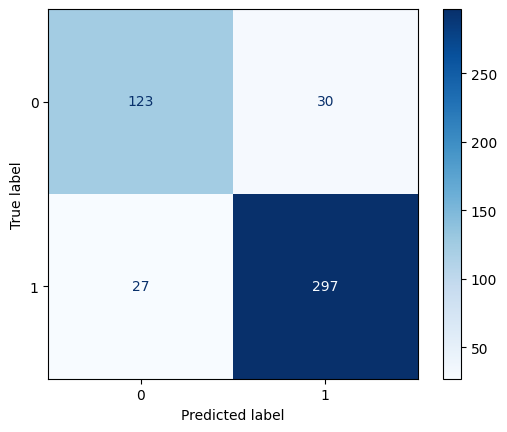

In [ ]:
disp=ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.show()

**Interpretation**

*  **FN = 27** is lower than before, so the model is **missing fewer real churn drivers now**. **FP = 30** is still small, which means only a few active drivers are wrongly predicted as churned.

*  **FP = 30** remain the same, meaning **30 drivers** who are actually staying were predicted to leave. This does not have a big impact on the business, but it could be reviewed further if needed.

In [ ]:
print(classification_report(y_test,best_xgb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       153
           1       0.91      0.92      0.91       324

    accuracy                           0.88       477
   macro avg       0.86      0.86      0.86       477
weighted avg       0.88      0.88      0.88       477



**Interpretation**

*  **For the churned** (positive) class, **recall (92%)** is slightly higher than precision (91%), meaning the model correctly identified **92% of the drivers who actually churned**.

*  **For the non churned class** recall (0.80) is slighly lower than the precision **(0.82)**, meaning the model misses some drivers who actually stayed.

*  **Churn class F1 = 0.91** is a very good score. The lower F1 score for **non-churn (0.81)** shows the model wrongly predicted some drivers who actually stayed as churned.

**ROC Curve**

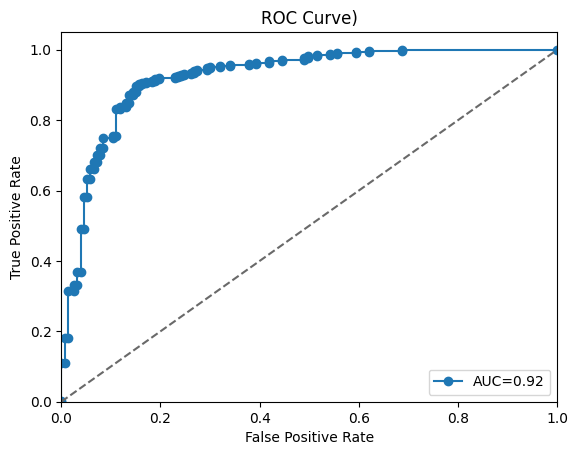

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
xgb_prob = ad_xgb.predict_proba(x_test)[:,1]
fpr, tpr, thresholds =roc_curve(y_test, xgb_prob)
roc_auc =roc_auc_score(y_test,xgb_prob)
plt.plot(fpr,tpr,marker='o',label=(f'AUC={roc_auc:.2f}'))
plt.plot([0, 1], [0, 1], color='dimgrey', linestyle='--')
plt.title("ROC Curve)")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()

**Interpretation**

*  The **ROC score is 0.925**, which is similar to the Random Forest model.

*  This indicates the model can effectively **distinguish between drivers who will leave and those who will stay.**

*  However, due to data imbalance, we cannot rely solely on the ROC score for model evaluation; metrics like precision, recall, and F1-score should also be considered.

#Feature importance

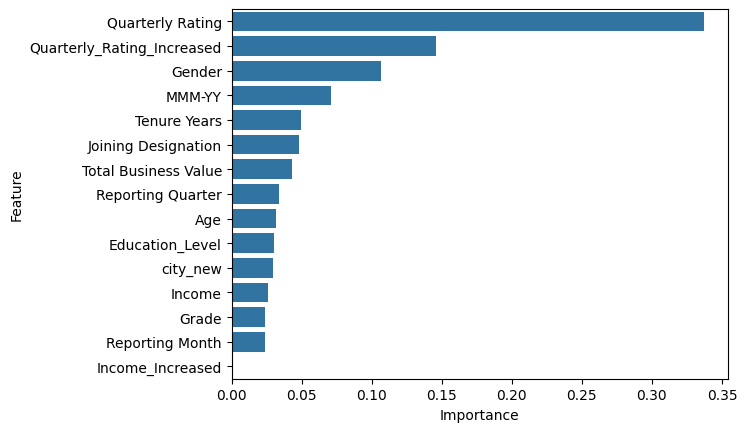

In [ ]:
feature=pd.DataFrame(ad_xgb.feature_importances_,columns=['Importance'],
             index=x_train_res.columns).sort_values('Importance',ascending=False).reset_index()
feature=feature.rename(columns={'index':'Feature'})
sns.barplot(x='Importance',y='Feature',data=feature)
plt.show()

**Interpretation**

*  From Random Forest we observed that **Quarterly rating** plays a major role in predicting driver churn.

*  The predictors that showed strong importance in the Random Forest model do not show the same level of importance in XGBoost.

#Questionnaire

**1. What percentage of drivers have received a quarterly rating of 5?**

**Ans** None of the drivers have a quarterly rating of 5 in the dataset.

**2. Comment on the correlation between Age and Quarterly Rating.**

**Ans** Age and Quarterly Rating have a weak positive correlation (0.17). This means that as age increases, quarterly rating slightly increases too,but not by much. Hence age is not a key factor in determining quarterly ratings.

**3. Name the city which showed the most improvement in Quarterly Rating over
the past year**

**Ans**  **City 14**'s Quaretly rate has been improved compared to previuos year.

**4. Drivers with a Grade of 'A' are more likely to have a higher Total Business Value.(T/F)**

**Ans**  **False** drivers with **Grade 3** has the highst business value than 1.

**5. If a driver's Quarterly Rating drops significantly, how does it impact their Total
Business Value in the subsequent period?**




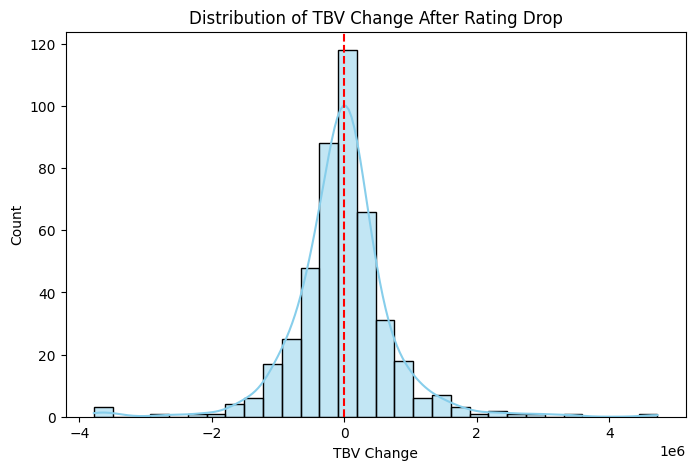

In [ ]:
df = df.sort_values(['Driver_ID', 'MMM-YY'])
df['Rating Change'] = df.groupby('Driver_ID')['Quarterly Rating'].diff()
rate_drop_df = df[df['Rating Change'] < 0].copy()
rate_drop_df['TBV next'] = rate_drop_df.groupby('Driver_ID')['Total Business Value'].shift(-1)

# TBV change = next period TBV − current TBV
rate_drop_df['TBV_Change'] = rate_drop_df['TBV next'] - rate_drop_df['Total Business Value']

clean_df = rate_drop_df.dropna(subset=['TBV_Change'])
plt.figure(figsize=(8,5))
sns.histplot(clean_df['TBV_Change'], bins=30, kde=True, color='skyblue')
plt.axvline(0, color='red', linestyle='--')
plt.title("Distribution of TBV Change After Rating Drop")
plt.xlabel("TBV Change")
plt.ylabel("Count")
plt.show()

In [ ]:
from scipy.stats import ttest_1samp

t_stat, p_value = ttest_1samp(tbv_change_report['TBV_Change'], 0)

print("t-statistic:", t_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Conclusion: TBV change is statistically significant.")
else:
    print("Conclusion: No significant TBV change detected.")

t-statistic: 0.1273543717937922
p-value: 0.9103098001425545
Conclusion: No significant TBV change detected.


 **Ans**
 *  Based on the data, a **significant drop** in a driver's quarterly rating **does not consistently reduce their Total Business Value** in the next period. While there may be a small average decrease, it is not statistically significant, which means rating drops alone do not reliably predict a decline in business. Other factors, such as cancellations, trip acceptance, and location demand, are more important in determining business value.”

**6. From Ola's perspective, which metric should be the primary focus for driver
retention?**

*  For Ola, **recall** is more **important** than precision, because recall reduces False Negatives (FN) — meaning it helps the model correctly catch drivers who are actually going to churn instead of wrongly treating them as retained.
*  Missing even one driver who is likely to leave is a big loss for Ola, because it impacts their business, customer experience, and earnings.
Identifying drivers at risk of leaving is more valuable than worrying about a few drivers who may get falsely flagged but are actually staying, because those cases can still be verified.

But when churn drivers are missed, the company can **lose business and reputation**, which directly leads to **revenue loss.**

**7. How does the gap in precision and recall affect Ola's relationship with its
drivers and customers?**

**Ans**

  **High recall for churn:** The model correctly identifies most drivers who are likely to leave. This lets Ola take timely actions to retain them, which strengthens the relationship with drivers.

  **Balanced precision and recall:** **Since precision and recall are close**, Ola does not mistakenly target drivers who are not actually leaving. This avoids unnecessary interventions, keeping drivers satisfied.

  **Impact on customers:** Retaining drivers **reduces cancellations and delays, ensuring a smoother experience for customers.**

Overall the small gap between precision and recall means Ola can efficiently retain at-risk drivers without upsetting stable drivers, benefiting both driver relationships and customer experience.

**8. Besides the obvious features like "Number of Rides", which lesser-discussed
features might have a strong impact on a driver's Quarterly Rating?**

**Ans**

*  Total Business Value has a significant impact on a driver’s rating. Other features, such as Age, Income, Gender, and Joining Designation, contribute much less to the rating.




**9. Will the driver's performance be affected by the City they operate in? (Yes/No)**

**Ans**
*  **Yes.**  Drivers operating in certain cities, such as City 17, contribute less to the total business value. This lower business contribution can lead to a decrease in their ratings, which in turn reflects on their overall performance.

**10.Analyze any seasonality in the driver's ratings. Do certain times of the year
correspond to higher or lower ratings, and why might that be?**

**Ans**

*  **Quarterly ratings drop during Q3 (July - September)**. These months correspond to the monsoon season in India, where heavy rainfall leads to traffic congestion, delays, cancellations, and longer ride durations. These operational challenges contribute to lower customer ratings despite driver performance. This indicates seasonality impact on driver ratings

# Recommendations

*  **Age, Gender, and Education** have **minimal influence** on predicting driver churn, as confirmed by our exploratory data analysis (EDA) and feature importance from modeling. Therefore, OLA does not prioritize these factors when designing driver retention strategies.

*  **Income** plays a key role in retaining drivers. We also observed that most drivers **leave within the first year of joining**. Therefore, OLA should consider **increasing the base salary** for new joiners to improve retention and ensure they can sustain in the long term.

*  Drivers who **generate lower business value** are more likely to churn. It is recommended to analyze low-contributing driver's cancellation rates. Understanding the reasons behind their lower contribution can help improve overall business value and reduce churn.

*  Certain cities show higher driver churn, possibly due to **operational challenges**, which may also negatively impact **driver ratings**. To **improve ratings and reduce cancellations**, it is recommended to provide **incentives** for drivers who take on challenging trips.

*  **Hiring educated drivers** or **training less-educated** ones is **costly**. OLA can **optimize costs and retention** by using targeted **talent acquisition** to hire skilled drivers who are likely to stay longer.

*  To further improve model performance, OLA can add features that are likely to enhance predictive power, such as **cancellation rate, trip acceptance rate, and more granular location information (e.g., specific city or state instead of codes like C34 or C45).**

*  After implementing the model, **periodic monitorin** is required. Continuous feedback should be used to evaluate the model,s performance with new predictors and ensure its effectiveness over time.

*  To improve classification accuracy, we can try other modeling approaches, such as cascading models.